In [110]:
from warnings import filterwarnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from textblob import Word, TextBlob
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from nltk.sentiment import SentimentIntensityAnalyzer
from warnings import filterwarnings

# Görev 1: Metin Ön İşleme

## Adım1: amazon.xlsx verisini oku

In [111]:
df = pd.read_excel("datasets/Case1/amazon-221126-161000/amazon.xlsx")

Verimize genel bakış atalım.

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Star     5611 non-null   int64 
 1   HelpFul  5611 non-null   int64 
 2   Title    5559 non-null   object
 3   Review   5593 non-null   object
dtypes: int64(2), object(2)
memory usage: 175.5+ KB


In [113]:
df.head(5)

,Star,HelpFul,Title,Review
0,5,0,looks great,Happy with it
1,5,0,Pattern did not align between the two panels.,Good quality material however the panels are m...
2,5,0,Imagery is stretched. Still fun.,Product was fun for bedroom windows.<br />Imag...
3,5,0,Que se ven elegantes muy finas,Lo unico que me gustaria es que sean un poco ...
4,5,0,Wow great purchase,Great bang for the buck I can't believe the qu...


In [114]:
df["Star"].value_counts()

Star
5    4126
4     588
1     368
3     315
2     214
Name: count, dtype: int64

Veriye genel bakış attıktan sonra verilen sorulara geçebilirim.

## Adım 2: Review Değişkeni Üzerinde:


1. Tüm harfleri küçük harfe çeviriniz.

In [115]:
#df["Review"] = str(df["Review"]).lower()

df["Review"] = df["Review"].str.lower()

In [116]:
df["Review"]

0                                           happy with it
1       good quality material however the panels are m...
2       product was fun for bedroom windows.<br />imag...
3        lo unico que me gustaria es que sean un poco ...
4       great bang for the buck i can't believe the qu...
                              ...                        
5606    great product for reasonable money.  delivered...
5607             color is way off and panels do not match
5608    these are great for my studio as they compleme...
5609    brought out the beauty in kids room. they love...
5610    very cute curtains in my sons room! thick enou...
Name: Review, Length: 5611, dtype: object

2. Noktalama işaretlerini çıkarınız.

In [117]:
df["Review"] = df["Review"].str.replace('[^\w\s]', ' ', regex=True)
# [^\w\s] anlamı
# [] --> Karakter sınıfıdır. İçerisindeki karakterlerden herhangi birinin eşleşmesini sağlar.
# ^ --> Karakter sınıfının başında ise "hariç" anlamı taşır. Yani \w\s dışındakilerin hepsini kapsar.
# \w --> Alfanümerik karakterleri (harfler, rakamlar ve alt çizgi) temsil eder.
# \s --> Boşluk karakterlerini (boşluk, satır başları gibi)

In [118]:
df["Review"]

0                                           happy with it
1       good quality material however the panels are m...
2       product was fun for bedroom windows  br   imag...
3        lo unico que me gustaria es que sean un poco ...
4       great bang for the buck i can t believe the qu...
                              ...                        
5606    great product for reasonable money   delivered...
5607             color is way off and panels do not match
5608    these are great for my studio as they compleme...
5609    brought out the beauty in kids room  they love...
5610    very cute curtains in my sons room  thick enou...
Name: Review, Length: 5611, dtype: object

3. Yorumlarda bulunan sayısal ifadeleri çıkartınız.

In [119]:
df["Review"] = df["Review"].str.replace('%d', ' ', regex=True)

4. Bilgi içermeyen kelimeleri (stopwords) veriden çıkarınız.

In [120]:
from nltk.corpus import stopwords

In [121]:
sw = stopwords.words("english")
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [122]:
df["Review"] = df["Review"].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

5. En az geçen 1000 kelimeleri çıkarınız.

In [123]:
sil = pd.Series(' '.join(df["Review"]).split()).value_counts()[-1000:]
df["Review"] = df["Review"].apply(lambda i: " ".join(i for i in i.split() if i not in sil))

In [124]:
pd.Series(' '.join(df["Review"]).split()).value_counts()[-1000:] #Kodu parçalara ayırıp tam olarak ne yaptığını görebilmek için yazdım.

desk           1
tighter        1
40th           1
masquerade     1
crapola        1
              ..
proud          1
pipe           1
discription    1
wen            1
definetly      1
Name: count, Length: 1000, dtype: int64

6. Lemmatization işlemini uygulayınız.

In [125]:
from textblob import Word

In [126]:
df["Review"] = df["Review"].apply(lambda x:" ".join([Word(word).lemmatize() for word in x.split()]))

# Görev 2: Metin Görselleştirme

## Adım 1: Barplot görselleştirme verileri için:

1. "Review değişkenin içerdiği kelimelerin frekanslarını hesaplayınız, tf olarak değiştiriniz.

```tf = df["Review"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()```

Yukarıdaki kodu yazınca --- "FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tf = df["Review"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()" --- böyle bir uyarı aldım. Uyarının anlamı pd.value_counts kullanılmayacağından bahsediyor. Bunun yerine pd.Series kullanmamı söylüyor.


In [127]:
tf = df["Review"].apply(lambda x: pd.Series(x.split(" ")).value_counts()).sum(axis=0).reset_index()

2. tf dataframe'inin sütunlarını yeniden adlandırınız: "words", "tf" şeklinde.

In [128]:
tf.columns = ["words","tf"]

In [129]:
tf

,words,tf
0,happy,203.0
1,good,542.0
2,quality,904.0
3,material,584.0
4,however,83.0
...,...,...
4468,accompanied,1.0
4469,knowing,1.0
4470,specifically,1.0
4471,relatively,1.0


3. "tf" değişkeninin değeri 500'den çok olanlara göre filtreleme işlemi yaparak barplot ile görselleştirme işlemini tamamlayınız.

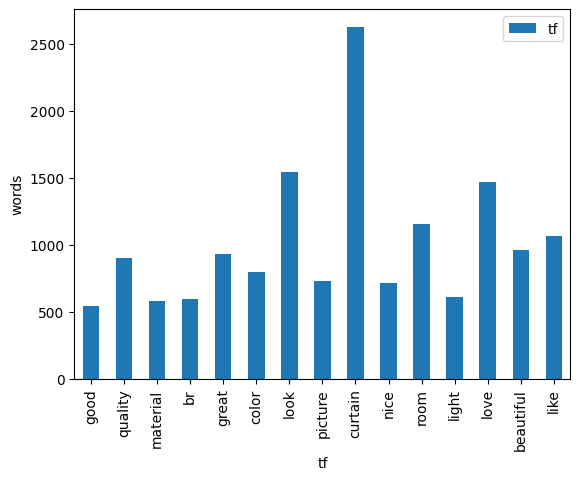

In [130]:
tf[tf["tf"]>500].plot.bar(x="words", y="tf")
plt.xlabel("tf")
plt.ylabel("words")
plt.show()

## Adım 2: WordCloud görselleştirme için:

1. "Review" değişkeninin içerdiği tüm kelimeleri "text" isminde string olarak kaydeniniz.

In [131]:
df.columns

Index(['Star', 'HelpFul', 'Title', 'Review'], dtype='object')

In [132]:
text = " ".join(i for i in df["Review"])
#Köşeli parantez şeklinde yazmak daha mantıklı. df.Review olarak yazarsam, Review değişkeni sadece Pythonda geçerli olan bir değişken ise kod çalışır.

2. WordCloud kullanarak şablon şeklinizi belirleyip kaydediniz.

In [133]:
wordcloud = WordCloud(max_font_size=32, background_color="black")

3. Kaydettiğiniz WordCloud'u ilk adımda oluşturduğunuz string ile generate ediniz.

In [134]:
wordcloud.generate(text)

4. Görselleştirme adımlarını tamamlayınız. (figure, imshow, axis, show)

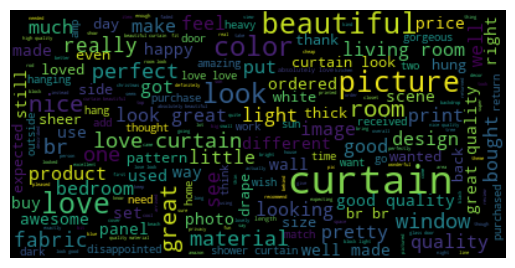

In [135]:
plt.figure()
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

# Görev 3: Duygu Analizi

## Adım 1: Python içerisindeki NLTK paketinde tanımlanmış olan SentimentIntensityAnalyzer nesnesini oluşturunuz.

In [136]:
sia = SentimentIntensityAnalyzer()

## Adım 2: SentimentIntensityAnalyzer nesnesi ile polarite puanlarını inceleyiniz.

1. "Review" değişkeninin ilk 10 gözlemi için polarity_scores() hesaplayınız.

In [137]:
df["Review"][:10] #ilk 10 değeri getirelim

0                                                happy
1       good quality material however panel mi matched
2    product fun bedroom window br imagery bit stre...
3                              lo que e que un poco ma
4    great bang buck believe quality material vibra...
5                                 look different photo
6      exactly looking heavy material great price fast
7    looking picture thought curtain would thinner ...
8      much thought would really expecting wanting use
9    curtain picture show 3rd set ambesonne curtain...
Name: Review, dtype: object

In [138]:
df["Review"][:10].apply(lambda x: sia.polarity_scores(x)) #ilk 10 değerin polarity değerlerine bakalım.

0    {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...
1    {'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'comp...
2    {'neg': 0.0, 'neu': 0.563, 'pos': 0.437, 'comp...
3    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4    {'neg': 0.0, 'neu': 0.472, 'pos': 0.528, 'comp...
5    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6    {'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'comp...
7    {'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'comp...
8    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9    {'neg': 0.0, 'neu': 0.772, 'pos': 0.228, 'comp...
Name: Review, dtype: object

2. İncelenen ilk 10 gözlem için compound skorlarına göre filtreleyerek tekrar gözlemleyiniz.

In [139]:
df["Review"][:10].apply(lambda x: sia.polarity_scores(x)["compound"])

0    0.5719
1    0.4404
2    0.8519
3    0.0000
4    0.9042
5    0.0000
6    0.6249
7    0.9080
8    0.0000
9    0.7096
Name: Review, dtype: float64

3. 10 gözlem için compound skorlarını 0'dan büyükse "pos", değilse "neg" şeklinde güncelleyiniz.

In [140]:
df["Review"][:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

0    pos
1    pos
2    pos
3    neg
4    pos
5    neg
6    pos
7    pos
8    neg
9    pos
Name: Review, dtype: object

4. "Review" değişkenindeki tüm gözlemler için pos-neg atamasını yaparak yeni bir değişken olarak dataframe'e ekleyiniz.

In [141]:
df["Polarity_Score"] = df["Review"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

# Görev 4: Makine Öğrenmesine Hazırlık

## Adım 1: Bağımlı ve bağımsız değişkenleri belirleyerek veriyi train test olarak ayırınız.

In [142]:
y = df["Polarity_Score"] # bağımlı değişken
x = df["Review"] # bağımsız değişken

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)

In [143]:
x_train, x_test, y_train, y_test= train_test_split(df["Review"], df["Polarity_Score"], random_state=42)

## Adım 2: Makine öğrenmesi modeline verileri verebilmemiz için temsil şekillerini sayısala çevirmemiz gerekmekte;

1. TfidfVectorizer kullanarak bir nesne oluşturun.

In [144]:
tf_idf_word_vectorizer = TfidfVectorizer().fit(x_train)

2. Daha önce ayırmış olduğumuz train datamızı kullanarak oluşturduğumuz nesneyi fit ediniz.

In [145]:
x_train_tf_idf_word = tf_idf_word_vectorizer.fit_transform(x_train)

3. Oluşturmuş olduğumuz vektörü train ve test datalarını transform işlemini uygulayıp kaydediniz.

In [146]:
x_test_tf_idf_word = tf_idf_word_vectorizer.transform(x_test)

# Görev 5: Modelleme (Lojistik Regresyon)

## Adım 1: Lojistik regresyon modelini kurarak train dataları ile fit ediniz.

In [147]:
log_model = LogisticRegression().fit(x_train_tf_idf_word,y_train)

## Adım 2: Kurmuş olduğunuz model ile tahmin işlemleri gerçekleştiriniz.

### 1. PredictPredict fonksiyonu ile test datasını tahmin ederek kaydediniz.

In [148]:
log_model.predict(x_test_tf_idf_word)

array(['pos', 'pos', 'pos', ..., 'pos', 'pos', 'pos'], dtype=object)

### 2. classification_report ile tahmin sonuçlarınızı raporlayıp gözlemleyiniz.

In [149]:
print(classification_report(log_model.predict(x_test_tf_idf_word), y_test))

              precision    recall  f1-score   support

         neg       0.29      0.97      0.45        64
         pos       1.00      0.89      0.94      1339

    accuracy                           0.89      1403
   macro avg       0.65      0.93      0.70      1403
weighted avg       0.97      0.89      0.92      1403



### 3. cross validation fonksiyonunu kullanarak ortalama accuracy değerini hesaplayınız.

In [150]:
cross_val_score(log_model, x_test_tf_idf_word, y_test, cv=5, scoring= "accuracy").mean()

np.float64(0.8617259786476869)

## Adım 3: Veride bulunan yorumlardan ratgele seçerek modele sorulması;

1. sample fonksiyonu ile "Review" değişkeni içerisinden örneklem seçerek yeni bir değere atayınız.


In [151]:
random_review = pd.Series(df["Review"].sample(1).values)

2. Elde ettiğiniz örneklemi modelin tahmin edebilmesi için CountVectorizer ile vektörleştiriniz.

In [152]:
new_review = CountVectorizer().fit(x_train).transform(random_review)

3. Vektörleştirdiğiniz örneklemi fit ve transform işlemlerini yaparak kaydediniz.

4. Kurmuşolduğunuz modele örneklemi vererek tahmin sonucunu kaydediniz.

In [153]:
new_pred = log_model.predict(new_review)

5. Örneklemi ve tahmin sonucunu ekrana yazdırınız.

In [154]:
print(f"Review: {review[0]} \n Prediction: {new_pred}")

Review: good price style dont expect lined anything worked needed something kind style pattern 
 Prediction: ['pos']


# Görev 6: Modelleme (Random Forest)

## Adım 1:  Random Forest modeli ile tahmin sonuçlarının gözlenmesi;

1. RandomForestClassifier modelini kurup fit ediniz.

In [155]:
rf_model = RandomForestClassifier().fit(x_train_tf_idf_word, y_train)

2. Cross validation fonksiyonunu kullanarak ortalama accuracy değerini hesaplayınız.

In [156]:
rf_model_value = cross_val_score(rf_model, x_test_tf_idf_word, y_test, cv = 5, n_jobs=-1).mean()

3. Lojistik regresyon modeli ile sonuçları karşılaştırınız.